In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import bz2
import os
import ujson
import attr
import math

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm_notebook
from itertools import islice
from collections import OrderedDict, defaultdict
from pyemd import emd

from sklearn.cluster import AgglomerativeClustering
from scipy import stats

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [4]:
ds = Dataset('../../data/top200-3bins.json/')

In [5]:
novels = list(ds.novels())

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [34]:
def plot_quad(token, w=5, h=5, xlim=(-15,15), ylim=(-15,15)):

    counts = [np.array(novel['counts'][token]) for novel in novels]
    counts = np.stack([s for s in counts if s.sum() > 100])

    x, y = [], []
    for s in counts:
        
        n = s.sum()
        p = 1 / len(s)

        mean = n * p
        var = mean * (1-p)
        std = np.sqrt(var)
        
        x.append((s[1]-s[0])/std)
        y.append((s[2]-s[1])/std)
        
    print(token)

    plt.figure(figsize=(w,h))
    plt.axhline(0, c='black', linewidth=1)
    plt.axvline(0, c='black', linewidth=1)
    
    if xlim:
        plt.xlim(xlim)
        
    if ylim:
        plt.ylim(ylim)
    
    plt.scatter(x, y, s=1, alpha=0.5)
    plt.plot([np.mean(x)], [np.mean(y)], color='black', markersize=5, marker='o')
    print(np.mean(x), np.mean(y))
    
    plt.show()

a
-1.4292275852934702 -1.099981732469134


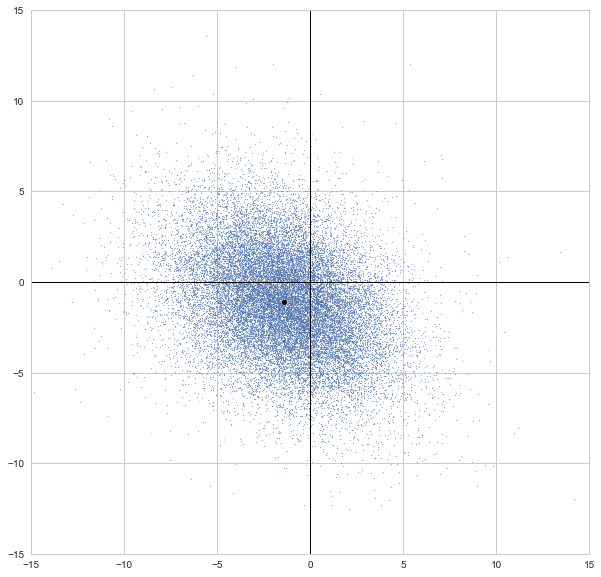

In [37]:
plot_quad('a', 10, 10)

the
-1.1419200390496878 0.6421778534066459


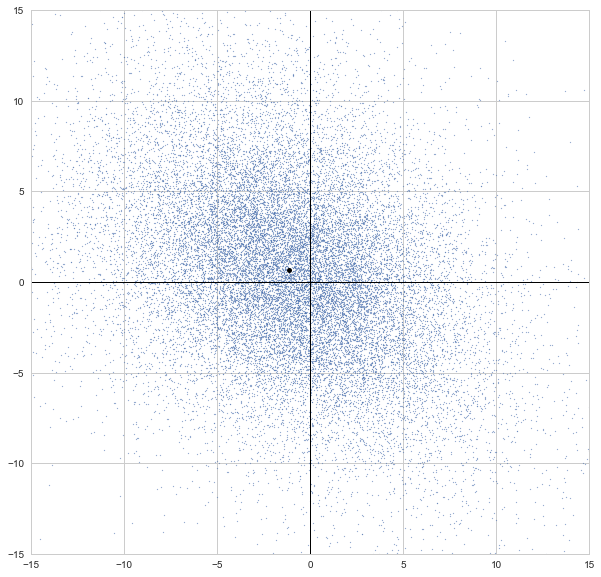

In [38]:
plot_quad('the', 10, 10)

and
-0.5897904469279552 0.3981657727866017


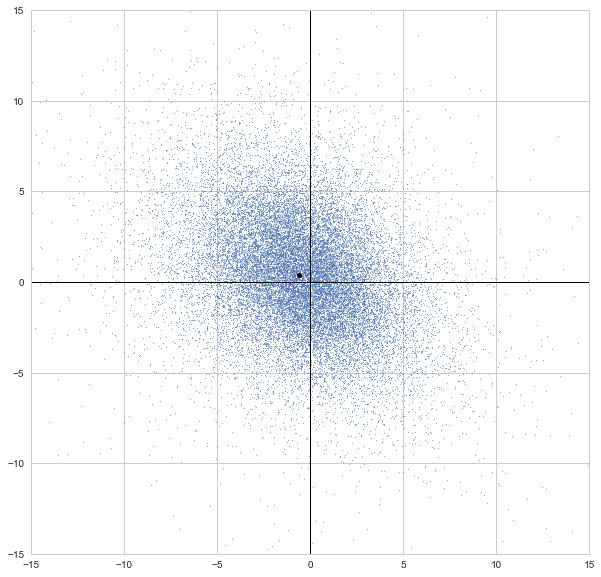

In [39]:
plot_quad('and', 10, 10)

or
-0.3120569746756417 -0.5944890137322106


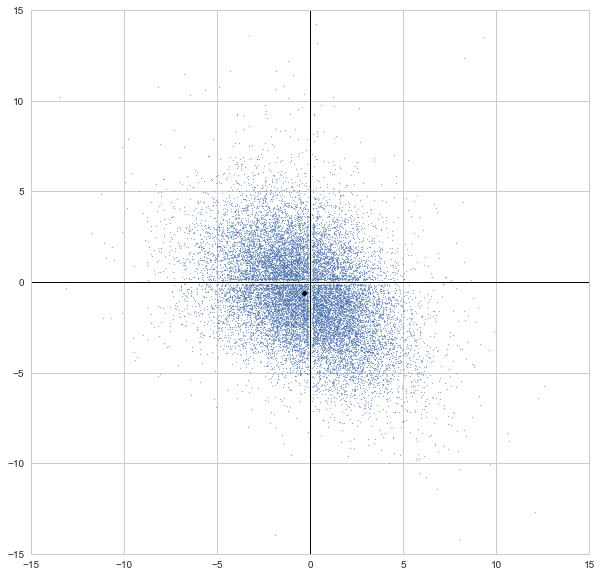

In [40]:
plot_quad('or', 10, 10)

?
1.1200931607210307 -0.30689408551891695


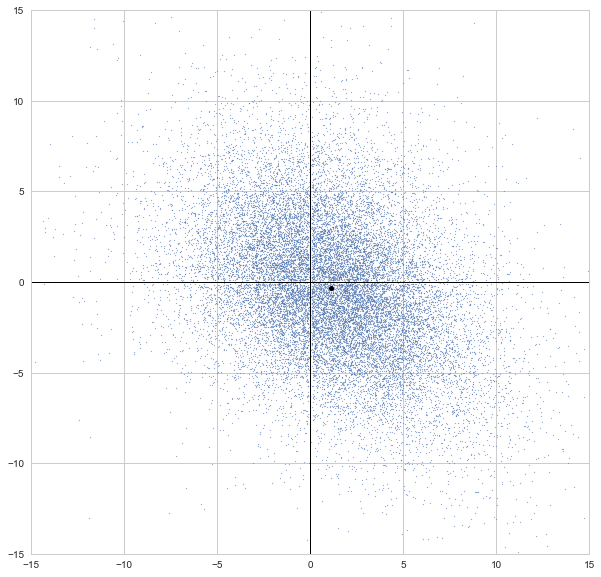

In [48]:
plot_quad('?', 10, 10)